✅ Dataset loaded
Shape: (1338, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Columns and types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


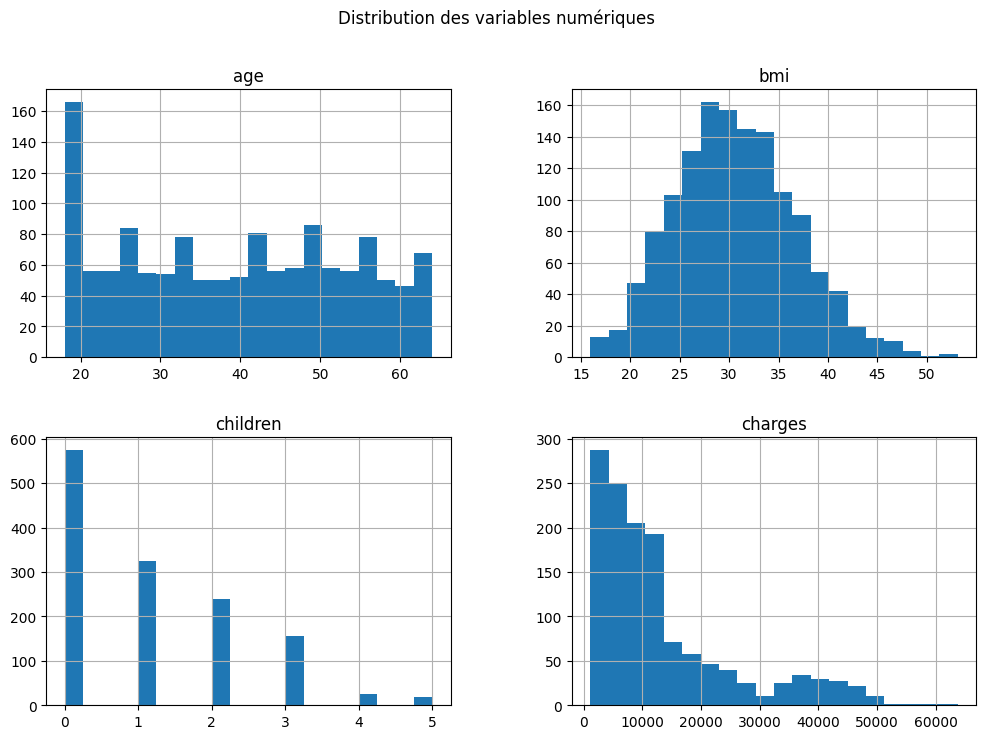

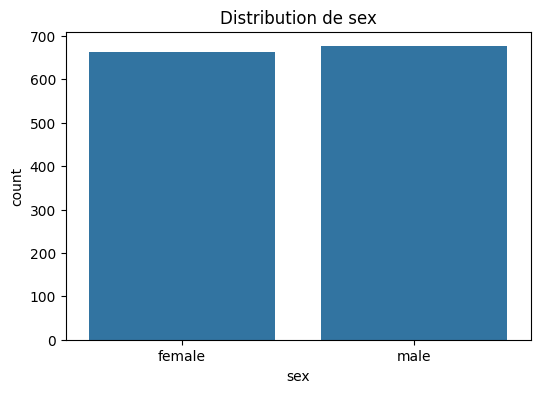

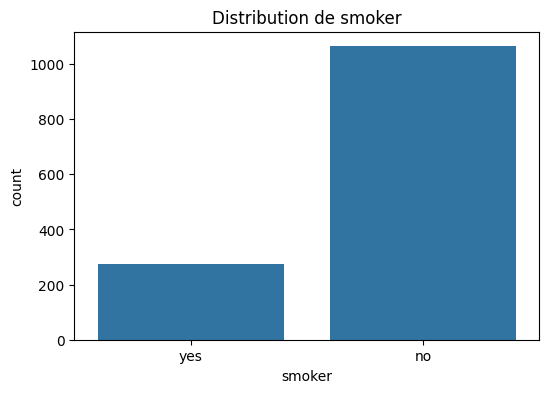

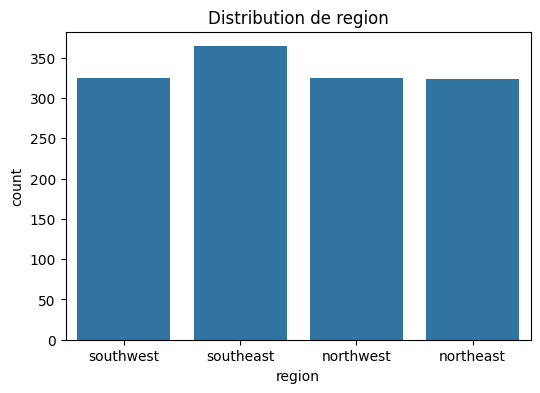

ValueError: could not convert string to float: 'female'

<Figure size 800x600 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
# 0️⃣ Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Charger les données
data_path = "insurance.csv"
df = pd.read_csv(data_path)
print("✅ Dataset loaded")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# 2️⃣ Aperçu des données
print("\nColumns and types:")
print(df.dtypes)

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

# 3️⃣ Analyse univariée
# Histogrammes pour toutes les colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution des variables numériques")
plt.show()

# Countplots pour les colonnes catégorielles
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution de {col}")
    plt.show()

# 4️⃣ Analyse bivariée
# Corrélation numérique
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Relation features vs target
target_col = "charges"
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y=target_col)
        plt.title(f"{col} vs {target_col}")
        plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y=target_col)
    plt.title(f"{col} vs {target_col}")
    plt.show()


In [4]:
# 5️⃣ Encodage des features
from sklearn.preprocessing import StandardScaler
target_col = "charges"

X = df.drop(columns=[target_col])
y = df[target_col]

# Colonnes catégorielles et numériques
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()
print("\nColonnes numériques :", numerical_cols)
print("Colonnes catégorielles :", categorical_cols)

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print("\nExemple d'encodage (5 premières lignes) :")
display(X_encoded.head())

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
print("\nExemple après standardisation (5 premières lignes) :")
print(X_scaled[:5])



Colonnes numériques : ['age', 'bmi', 'children']
Colonnes catégorielles : ['sex', 'smoker', 'region']

Exemple d'encodage (5 premières lignes) :


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False



Exemple après standardisation (5 premières lignes) :
[[-1.43876426 -0.45332    -0.90861367 -1.0105187   1.97058663 -0.56641788
  -0.61132367  1.76548098]
 [-1.50996545  0.5096211  -0.07876719  0.98959079 -0.5074631  -0.56641788
   1.63579466 -0.56641788]
 [-0.79795355  0.38330685  1.58092576  0.98959079 -0.5074631  -0.56641788
   1.63579466 -0.56641788]
 [-0.4419476  -1.30553108 -0.90861367  0.98959079 -0.5074631   1.76548098
  -0.61132367 -0.56641788]
 [-0.51314879 -0.29255641 -0.90861367  0.98959079 -0.5074631   1.76548098
  -0.61132367 -0.56641788]]
